In [220]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
#creating SQL connection
conn = sqlite3.connect('../Data/olympics.db')
c = conn.cursor()

#function to close connection
def close_c_conn():
    c.close()
    conn.close()

# Exploratory Data Analysis (EDA)

In [11]:
#select SQL athletes table
athletes = pd.read_sql_query("SELECT * FROM athletes;", conn)
athletes = athletes.drop(['level_0', 'index'], axis=1)
print(athletes.shape)
athletes.head()

(3091, 11)


,NOC,Year,Total_Athletes,Athlete_Percentage,Females,Female_Ratio,Sports_Competed,Sports_Percentage,Age,Height,Weight
0,GBR,1896,25,6.578947,0,0.0,7,77.777778,26.526316,188.000000,102.000000
1,GER,1896,94,24.736842,0,0.0,6,66.666667,24.261905,163.681818,64.714286
2,GRE,1896,148,38.947368,0,0.0,9,100.000000,21.235294,175.666667,78.000000
3,USA,1896,27,7.105263,0,0.0,3,33.333333,23.074074,179.875000,72.461538
4,AUS,1900,6,0.309917,0,0.0,2,10.000000,22.000000,178.000000,71.000000


In [40]:
#select SQL medals table
medals = pd.read_sql_query("SELECT * FROM medals;", conn)
medals = medals.drop(['index'], axis=1)
print(medals.shape)
medals.head()

(1323, 7)


,NOC,Year,Total_Medals,Golds,Silvers,Bronzes,Win_Percentage
0,AUS,1896,2,2,0,0,1.324503
1,AUT,1896,5,2,1,2,3.311258
2,DEN,1896,6,1,2,3,3.973510
3,FRA,1896,11,5,4,2,7.284768
4,GBR,1896,7,2,3,2,4.635762


In [ ]:
#close connection
close_c_conn()

In [53]:
#join athletes and medals table
olympics = pd.merge(athletes, medals, how='left', left_on=['Year','NOC'], right_on = ['Year','NOC'])
olympics = olympics.fillna(0)

target = olympics.pop('Total_Medals')
olympics.insert(loc=0, column='Total_Medals', value=target)
print(olympics.shape)
olympics.head()

(3091, 16)


,Total_Medals,NOC,Year,Total_Athletes,Athlete_Percentage,Females,Female_Ratio,Sports_Competed,Sports_Percentage,Age,Height,Weight,Golds,Silvers,Bronzes,Win_Percentage
0,7.0,GBR,1896,25,6.578947,0,0.0,7,77.777778,26.526316,188.000000,102.000000,2.0,3.0,2.0,4.635762
1,33.0,GER,1896,94,24.736842,0,0.0,6,66.666667,24.261905,163.681818,64.714286,26.0,5.0,2.0,21.854305
2,52.0,GRE,1896,148,38.947368,0,0.0,9,100.000000,21.235294,175.666667,78.000000,10.0,20.0,22.0,34.437086
3,20.0,USA,1896,27,7.105263,0,0.0,3,33.333333,23.074074,179.875000,72.461538,11.0,7.0,2.0,13.245033
4,5.0,AUS,1900,6,0.309917,0,0.0,2,10.000000,22.000000,178.000000,71.000000,2.0,0.0,3.0,0.976562


In [52]:
olympics.describe()

,Total_Medals,Year,Total_Athletes,Athlete_Percentage,Females,Female_Ratio,Sports_Competed,Sports_Percentage,Age,Height,Weight,Golds,Silvers,Bronzes,Win_Percentage
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000
mean,11.689421,1987.418311,86.547719,1.097063,24.075704,0.251110,8.477192,29.543835,25.152553,174.182199,70.000707,3.940796,3.870592,3.878033,1.031889
std,34.230996,25.748737,141.037677,2.724961,49.429916,0.208539,7.875881,26.581134,3.367347,5.289106,7.747844,14.461266,11.549026,10.726627,3.275812
min,0.000000,1896.000000,1.000000,0.007235,0.000000,0.000000,1.000000,2.439024,13.000000,151.000000,43.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1972.000000,7.000000,0.061337,1.000000,0.041510,3.000000,8.823529,23.333333,171.000000,65.301797,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1996.000000,25.000000,0.242611,3.000000,0.250000,5.000000,17.647059,24.917241,174.600000,70.053571,0.000000,0.000000,0.000000,0.000000
75%,5.500000,2008.000000,97.000000,1.119219,21.500000,0.405063,12.000000,45.454545,26.500000,177.396309,73.791827,1.000000,1.000000,2.000000,0.415800
max,496.000000,2016.000000,1109.000000,85.242121,369.000000,1.000000,40.000000,100.000000,66.000000,198.000000,148.000000,210.000000,156.000000,130.000000,83.829787


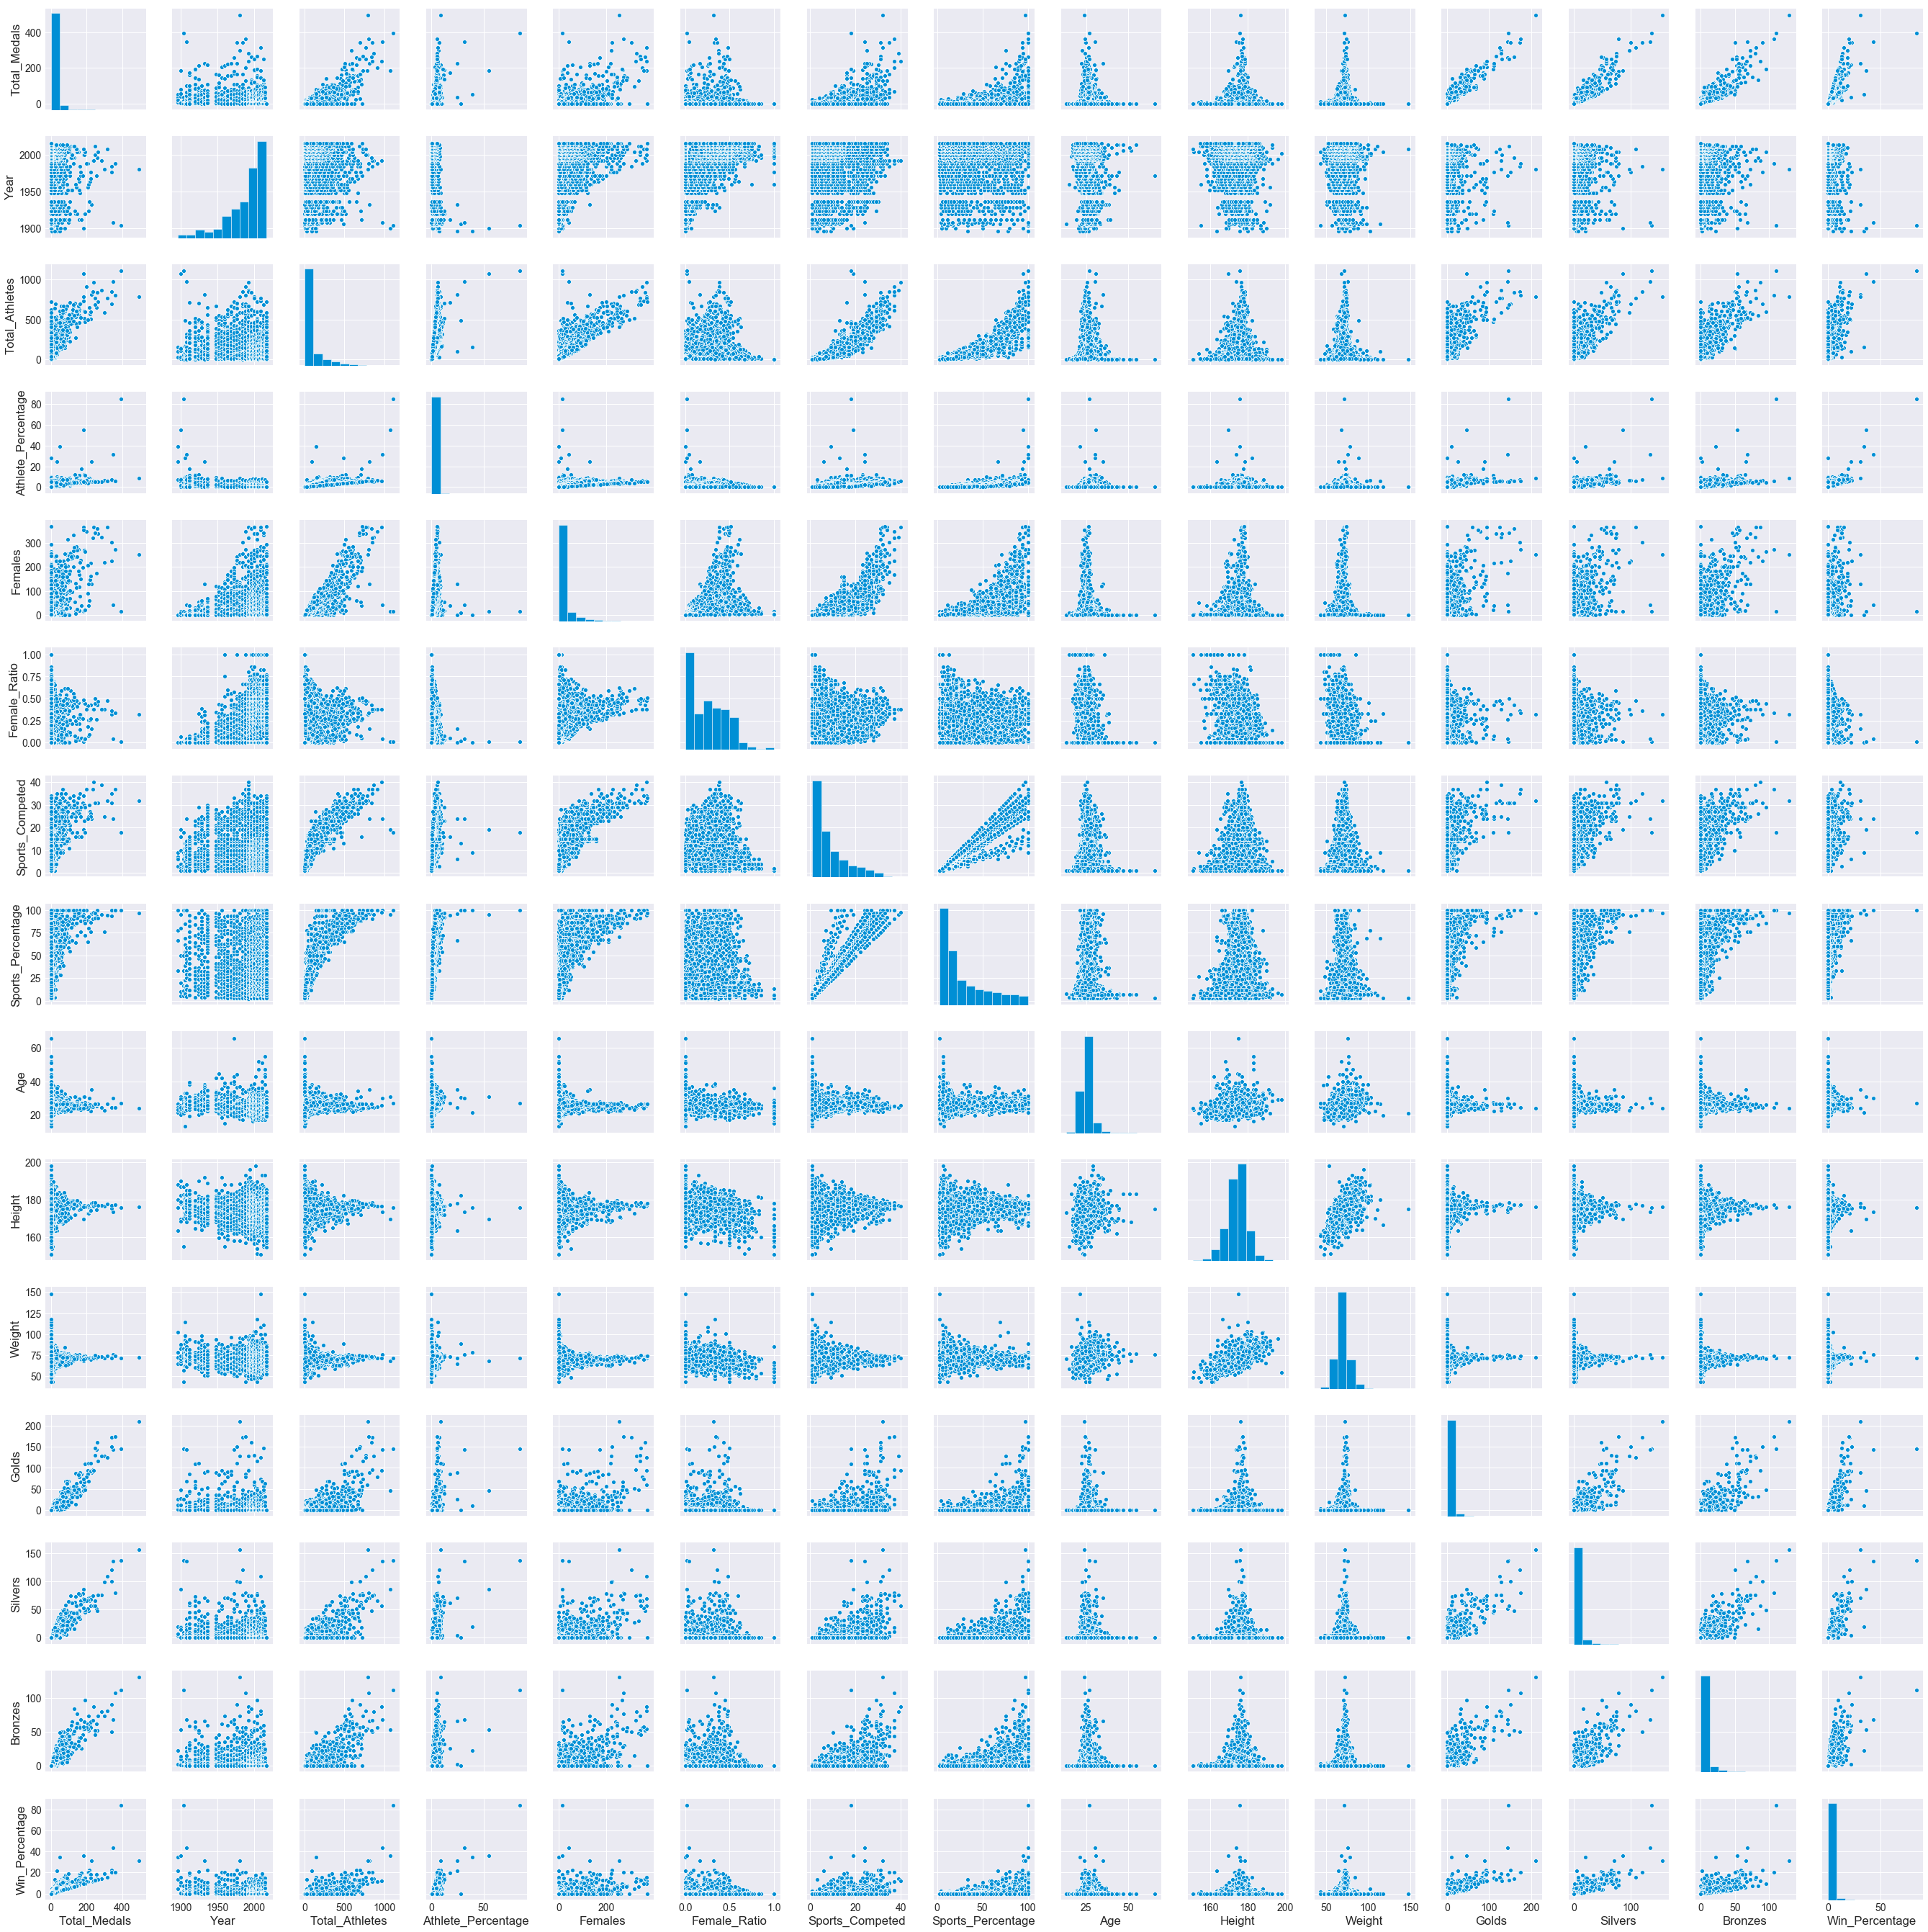

In [54]:
# Use a pairplot visualization to understand the relationships between
# all the variables in the dataset
sns.pairplot(olympics)
plt.show()

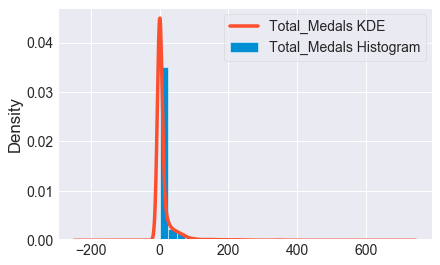

In [68]:
olympics['Total_Medals'].plot.hist(normed = True, label = 'Total_Medals' + " Histogram", bins=20)
olympics['Total_Medals'].plot.kde(label = 'Total_Medals' + " KDE", linewidth = 3.5)
plt.legend()
plt.show()

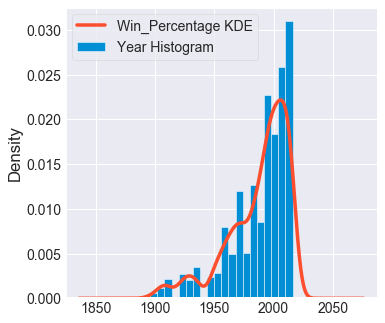

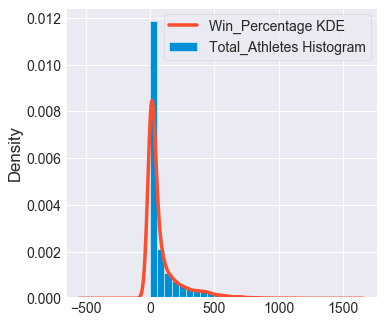

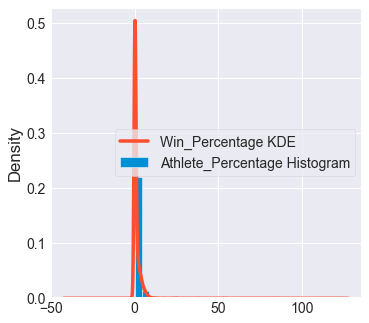

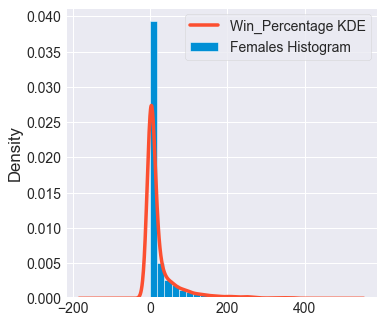

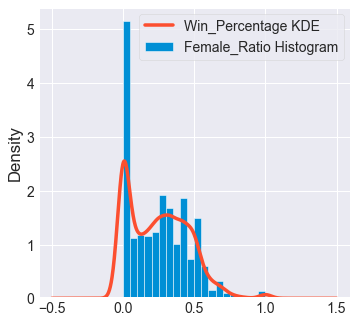

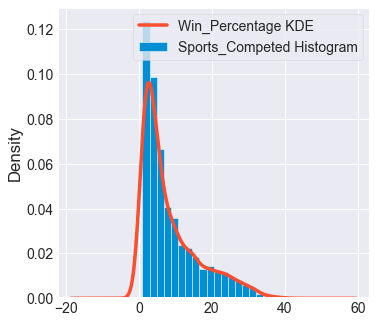

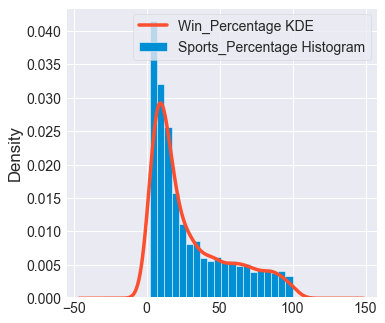

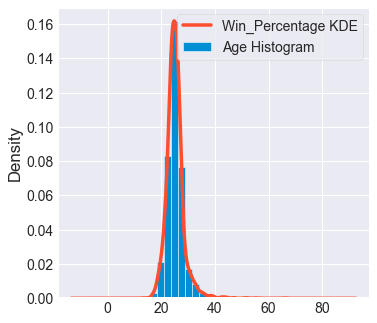

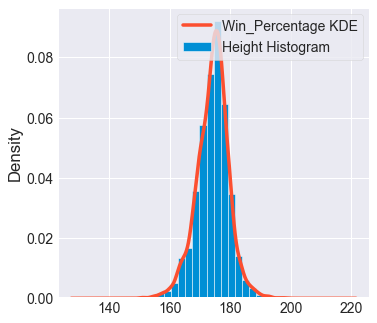

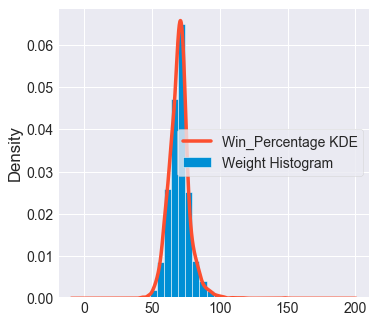

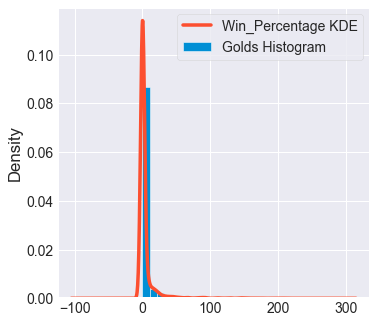

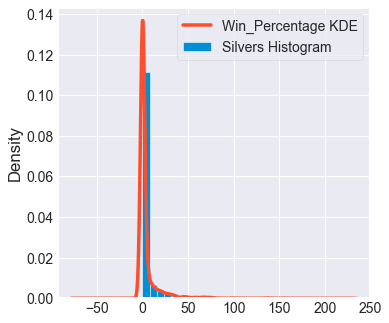

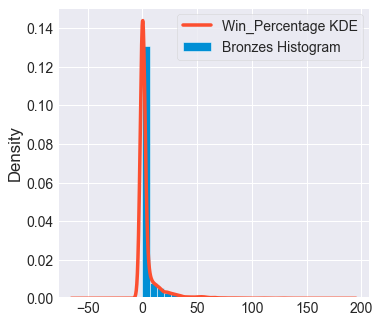

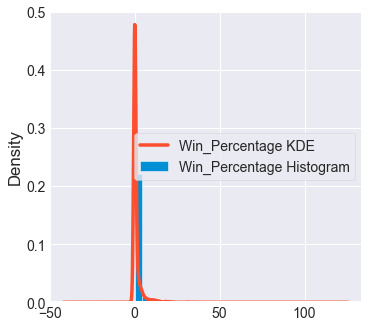

In [78]:
for column in olympics.columns[2:]:
    plt.figure(figsize = (5,5))
    olympics[column].plot.hist(normed = True, label = column + " Histogram", bins=20)
    olympics[column].plot.kde(label = columns + " KDE", linewidth = 3.5)
    plt.legend()
    plt.show()

In [55]:
# Create a copy of the data to perform correlation calculations
correlations = olympics.iloc[:, :].corr()
correlations

,Total_Medals,Year,Total_Athletes,Athlete_Percentage,Females,Female_Ratio,Sports_Competed,Sports_Percentage,Age,Height,Weight,Golds,Silvers,Bronzes,Win_Percentage
Total_Medals,1.000000,-0.181764,0.808232,0.613056,0.681548,0.047597,0.610092,0.595627,0.069297,0.105165,0.070590,0.940787,0.934165,0.917095,0.851732
Year,-0.181764,1.000000,-0.199629,-0.329276,0.096344,0.543417,-0.120843,-0.163414,-0.147177,-0.055334,-0.068249,-0.156795,-0.184965,-0.169516,-0.256809
Total_Athletes,0.808232,-0.199629,1.000000,0.661621,0.863730,0.079677,0.882612,0.847053,0.083998,0.136836,0.078490,0.703518,0.773313,0.798184,0.680807
Athlete_Percentage,0.613056,-0.329276,0.661621,1.000000,0.377850,-0.037310,0.462233,0.593743,0.114319,0.082792,0.078859,0.533834,0.616019,0.573451,0.852075
Females,0.681548,0.096344,0.863730,0.377850,1.000000,0.285852,0.793186,0.732368,0.011864,0.096891,0.028571,0.597044,0.638253,0.682865,0.457138
Female_Ratio,0.047597,0.543417,0.079677,-0.037310,0.285852,1.000000,0.121022,0.123701,-0.209066,-0.255220,-0.288477,0.038169,0.043597,0.053495,-0.004264
Sports_Competed,0.610092,-0.120843,0.882612,0.462233,0.793186,0.121022,1.000000,0.911915,0.087897,0.178175,0.112347,0.503251,0.590014,0.633220,0.458344
Sports_Percentage,0.595627,-0.163414,0.847053,0.593743,0.732368,0.123701,0.911915,1.000000,0.123923,0.179127,0.135150,0.493208,0.580553,0.610785,0.560472
Age,0.069297,-0.147177,0.083998,0.114319,0.011864,-0.209066,0.087897,0.123923,1.000000,0.184681,0.254605,0.054371,0.072008,0.070311,0.091405
Height,0.105165,-0.055334,0.136836,0.082792,0.096891,-0.255220,0.178175,0.179127,0.184681,1.000000,0.684548,0.093301,0.096615,0.105798,0.082112


In [56]:
# Create a boolean table were significant correlations are highlighted
abs(correlations) > 0.75

,Total_Medals,Year,Total_Athletes,Athlete_Percentage,Females,Female_Ratio,Sports_Competed,Sports_Percentage,Age,Height,Weight,Golds,Silvers,Bronzes,Win_Percentage
Total_Medals,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True
Year,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Total_Athletes,True,False,True,False,True,False,True,True,False,False,False,False,True,True,False
Athlete_Percentage,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
Females,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False
Female_Ratio,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Sports_Competed,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False
Sports_Percentage,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
Height,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


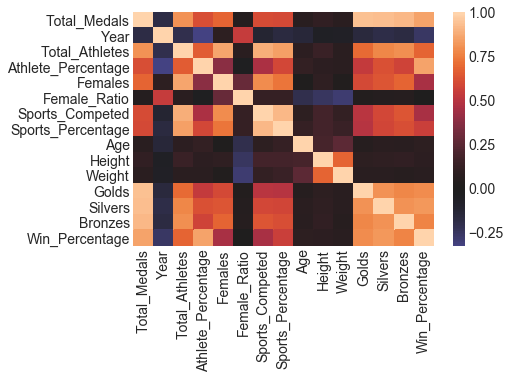

In [57]:
# Use a heatmap to evaluate correlations between the numerical variables
sns.heatmap(correlations, center = 0)

In [129]:
X = olympics.copy()
f = """Total_Medals~
       Total_Athletes"""
lin_regression = smf.ols(formula = f, data = X).fit()
lin_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5819.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:51:57   Log-Likelihood:                -13669.
No. Observations:                3091   AIC:                         2.734e+04
Df Residuals:                    3089   BIC:                         2.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.2882      0.425    -12.429      0.000      -6.122      -4.454
Total_Athletes     0.1962      0.003     76.283      0.000       0.191       0.201
==============================================================================
Omnibus:                     2750.443   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373789.184
Skew:                           3.660   Prob(JB):                         0.00
Kurtosis:                      56.373   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
X = olympics.copy()
f = """Total_Medals~
        Year+
        Total_Athletes+
        Athlete_Percentage+
        Females+
        Female_Ratio+
        Sports_Competed+
        Sports_Percentage+
        Age+
        Height+
        Weight"""
num_regression = smf.ols(formula = f, data = X).fit()
num_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     741.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:10:46   Log-Likelihood:                -13412.
No. Observations:                3091   AIC:                         2.685e+04
Df Residuals:                    3080   BIC:                         2.691e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -8.3717     36.778     -0.228      0.820     -80.483      63.739
Year                  -0.0052      0.018     -0.290      0.772      -0.040       0.030
Total_Athletes         0.2727      0.010     27.379      0.000       0.253       0.292
Athlete_Percentage     1.1552      0.227      5.085      0.000       0.710       1.601
Females                0.0241      0.019      1.294      0.196      -0.012       0.061
Female_Ratio           3.9043      2.188      1.784      0.074      -0.386       8.195
Sports_Competed       -1.3859      0.144     -9.630      0.000      -1.668      -1.104
Sports_Percentage     -0.2004      0.036     -5.603      0.000      -0.271      -0.130
Age                    0.0654      0.105      0.624      0.532      -0.140       0.271
Height                 0.0628      0.088      0.711      0.477      -0.110       0.236
Weight                 0.1295      0.061      2.120      0.034       0.010       0.249
==============================================================================
Omnibus:                     2397.287   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392642.727
Skew:                           2.827   Prob(JB):                         0.00
Kurtosis:                      57.924   Cond. No.                     2.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
X = olympics.copy()
f = """Total_Medals~
        Total_Athletes+
        Sports_Competed"""
num_reduced_regression = smf.ols(formula = f, data = X).fit()
num_reduced_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3628.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:37:25   Log-Likelihood:                -13438.
No. Observations:                3091   AIC:                         2.688e+04
Df Residuals:                    3088   BIC:                         2.690e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2648      0.550      5.937      0.000       2.187       4.343
Total_Athletes      0.2963      0.005     58.364      0.000       0.286       0.306
Sports_Competed    -2.0309      0.091    -22.342      0.000      -2.209      -1.853
==============================================================================
Omnibus:                     2401.827   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           360963.991
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      55.630   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

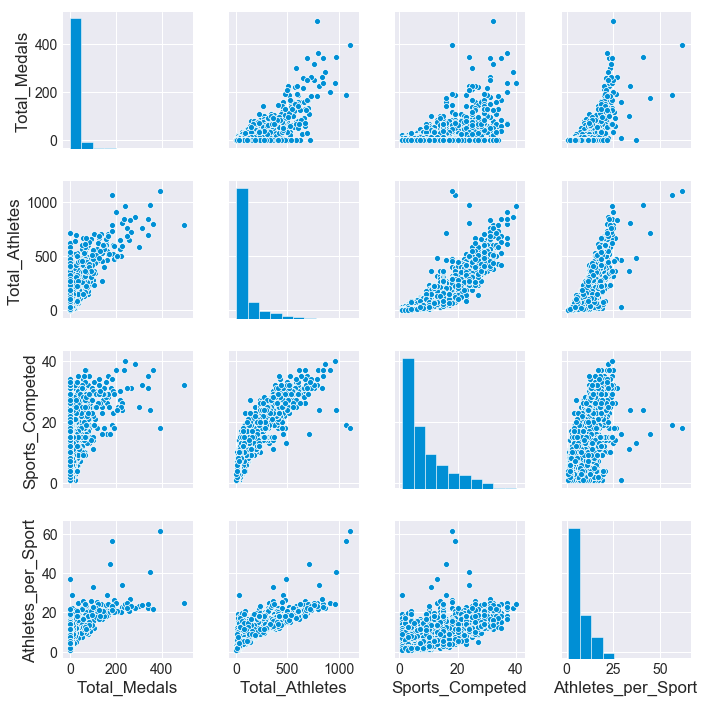

In [240]:
# Use a pairplot visualization to understand the relationships between
# all the variables in the dataset
reduced_df = olympics.copy()
reduced_df = reduced_df.drop(['Year'], axis=1)
reduced_df = reduced_df.drop(['Athlete_Percentage'], axis=1)
reduced_df = reduced_df.drop(['Female_Ratio', 'Females'], axis=1)
reduced_df = reduced_df.drop(['Sports_Percentage'], axis=1)
reduced_df = reduced_df.drop(['Age', 'Height', 'Weight'], axis=1)
reduced_df = reduced_df.drop(['Golds', 'Silvers', 'Bronzes', 'Win_Percentage'], axis=1)
reduced_df['Athletes_per_Sport'] = reduced_df['Total_Athletes'] / reduced_df['Sports_Competed']
sns.pairplot(reduced_df)
plt.show()

In [241]:
# Create a copy of the data to perform correlation calculations
reduced_correlations = reduced_df.iloc[:, :].corr()
reduced_correlations

,Total_Medals,Total_Athletes,Sports_Competed,Athletes_per_Sport
Total_Medals,1.000000,0.808232,0.610092,0.669779
Total_Athletes,0.808232,1.000000,0.882612,0.834252
Sports_Competed,0.610092,0.882612,1.000000,0.661616
Athletes_per_Sport,0.669779,0.834252,0.661616,1.000000


In [244]:
X = reduced_df.copy()
f = """Total_Medals~
        Total_Athletes+
        Sports_Competed+
        Athletes_per_Sport"""
cat_regression = smf.ols(formula = f, data = X).fit()
cat_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2484.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:02:58   Log-Likelihood:                -13409.
No. Observations:                3091   AIC:                         2.683e+04
Df Residuals:                    3087   BIC:                         2.685e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.5206      0.778      9.664      0.000       5.995       9.046
Total_Athletes         0.3351      0.007     46.917      0.000       0.321       0.349
Sports_Competed       -2.2385      0.094    -23.800      0.000      -2.423      -2.054
Athletes_per_Sport    -0.8649      0.113     -7.660      0.000      -1.086      -0.644
==============================================================================
Omnibus:                     2260.936   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           334761.746
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      53.720   Cond. No.                         391.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
cat_olympics = pd.get_dummies(reduced_df)
cat_olympics

,Total_Medals,Total_Athletes,Sports_Competed,Athletes_per_Sport,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,...,NOC_VIE,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,7.0,25,7,3.571429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33.0,94,6,15.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,148,9,16.444444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,27,3,9.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,6,2,3.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,7,1,7.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,185.0,1071,19,56.368421,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,78.0,146,16,9.125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40.0,103,10,10.300000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5.0,34,4,8.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# Create a copy of the data to perform correlation calculations
reduced_correlations = pd.DataFrame(cat_olympics.iloc[:, :].corr()['Total_Medals'])
reduced_correlations = reduced_correlations.sort_values(by='Total_Medals', ascending=False)
reduced_correlations.head(20)

,Total_Medals
Total_Medals,1.000000
Total_Athletes,0.808232
Females,0.681548
Sports_Competed,0.610092
NOC_USA,0.431405
NOC_URS,0.394856
NOC_GDR,0.196903
NOC_EUN,0.142606
NOC_GER,0.140874
NOC_GBR,0.124169


In [249]:
X = cat_olympics.copy()
f = """Total_Medals~
        Total_Athletes+
        Sports_Competed+
        NOC_USA+
        NOC_URS+
        NOC_GDR+
        NOC_EUN+
        NOC_GER+
        NOC_GBR+
        NOC_RUS+
        NOC_FRG+
        NOC_FRA+
        NOC_ITA+
        NOC_SWE"""
cat_regression = smf.ols(formula = f, data = X).fit()
cat_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     900.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:04:18   Log-Likelihood:                -12881.
No. Observations:                3091   AIC:                         2.579e+04
Df Residuals:                    3077   BIC:                         2.588e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9720      0.465      4.238      0.000       1.060       2.884
Total_Athletes      0.2403      0.005     45.983      0.000       0.230       0.250
Sports_Competed    -1.4401      0.081    -17.732      0.000      -1.599      -1.281
NOC_USA            50.9417      3.079     16.547      0.000      44.905      56.978
NOC_URS           147.9317      5.190     28.502      0.000     137.755     158.109
NOC_GDR            88.7795      6.493     13.673      0.000      76.049     101.510
NOC_EUN           129.6148     15.831      8.187      0.000      98.573     160.656
NOC_GER             0.3674      3.216      0.114      0.909      -5.939       6.673
NOC_GBR            -6.8454      2.787     -2.456      0.014     -12.309      -1.381
NOC_RUS            11.7350      4.287      2.738      0.006       3.330      20.140
NOC_FRG             1.1853      6.546      0.181      0.856     -11.650      14.020
NOC_FRA           -16.6982      2.883     -5.791      0.000     -22.352     -11.045
NOC_ITA            -4.0311      2.872     -1.404      0.161      -9.662       1.600
NOC_SWE             9.5168      2.786      3.415      0.001       4.053      14.980
==============================================================================
Omnibus:                     1082.873   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135188.281
Skew:                           0.610   Prob(JB):                         0.00
Kurtosis:                      35.376   Cond. No.                     9.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
X = cat_olympics.copy()
f = """Total_Medals~
        Total_Athletes+
        Sports_Competed+
        NOC_USA+
        NOC_URS+
        NOC_GDR+
        NOC_EUN+
        NOC_FRA"""
cat_regression = smf.ols(formula = f, data = X).fit()
cat_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Medals   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1655.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:04:39   Log-Likelihood:                -12896.
No. Observations:                3091   AIC:                         2.581e+04
Df Residuals:                    3083   BIC:                         2.586e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9424      0.465      4.175      0.000       1.030       2.855
Total_Athletes      0.2398      0.005     49.613      0.000       0.230       0.249
Sports_Competed    -1.4266      0.080    -17.856      0.000      -1.583      -1.270
NOC_USA            50.9315      2.984     17.070      0.000      45.081      56.782
NOC_URS           147.8902      5.145     28.745      0.000     137.802     157.978
NOC_GDR            88.7256      6.488     13.675      0.000      76.004     101.447
NOC_EUN           129.5452     15.842      8.177      0.000      98.483     160.607
NOC_FRA           -16.7720      2.849     -5.887      0.000     -22.358     -11.186
==============================================================================
Omnibus:                     1065.380   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128950.113
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                      34.620   Cond. No.                     9.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""